# <font color='orange'>TME ROBOTIQUE ET APPRENTISSAGE</font>
# <font color='orange'>1. Stratégies d'Evolution</font>

# <font color="green">Version ETUDIANT·ES 2025-2026</font>

*mise à jour: 3/12/2025*

Ce notebook doit être exécuté dans [Google Colab](colab.research.google.com/) ou dans Jupyter.

A la fin du TME, vous devez déposer votre travail sur Moodle:
* déposer votre notebook, avec le nom de fichier *obligatoirement* au format suivant: **RA_NOM1_NOM2.ipynb**
* toutes les cellules doivent être exécutées avec les graphes visibles
* un **bref** commentaire lorsque c'est demandé. Pour toutes les questions, une à deux phrases suffisent

*Le sujet est à faire en binome.*


---
---
---

# <font color='orange'>PREAMBULE: initialisation</font>

# Importation des librairies nécessaires et fonctions utiles

Il n'est pas nécessaire de regarder le code de ces cellules, elles sont utiles pour les fonctions utilisées dans la partie A.

Remarque: *Sauf en cas de redémarrage du noyau, il suffit d'exécuter ces cellules une seule fois.*

In [144]:
from datetime import datetime
from datetime import date
#import importlib # une seule fois
import sys
import random
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2025-12-12 11:43:37 GMT
OK.


In [145]:
print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2025-12-12 11:43:37 GMT
OK.


In [146]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
from scipy.optimize import minimize


def plot_results(my_func, my_points, min_x=-30, max_x=30, min_y=-30, max_y=30, nbx=100, nby=100, title="Title"):
    """Plots a 2D function with a heatmap and the points given as argument are plotted on top of it

    Plots a 2D function with a heatmap and the points given as argument are plotted on top of it:
    :param my_func: the function to plot on the background
    :param my_points: the points to plot
    :param min_x: min value of x
    :param max_x: max value of x
    :param min_y: min value of y
    :param max_y: max value of y
    :param nbx: number of my_func samples on the X-axis
    :param nby: number of my_func samples on the Y-axis
    :param title: title of the figure
    """
    X = np.linspace(min_x, max_x, num=nbx)
    Y = np.linspace(min_y, max_y, num=nby)
    Z=np.zeros((nbx,nby),dtype=np.double)
    for i in range(nbx):
        for j in range(nby):
            Z[i][j]=my_func(np.array([X[i],Y[j]]))
    fig,ax=plt.subplots(figsize=(5,5))
    ax.set_xlim(min_x,max_x)
    ax.set_ylim(min_y,max_y)
    ax.imshow(Z, cmap='hot', interpolation='nearest',extent=(min_x,max_x,min_y,max_y),origin='lower')

    #print("Points: "+str(my_points))
    x=[]
    y=[]
    for p in my_points:
        x.append(p[0])
        y.append(p[1])

    ax.plot(x,y,".")
    ax.set_title(title)
    plt.show()

def plot_violin(res):
    """ Makes a violin plot of the results provided in the argument

    Makes a violin plot of the results provided in the argument.
    :param res: dictionary of the results to plot. The key is the name and the data is a vector of performance values.
    """
    fig,ax=plt.subplots(figsize=(5,5))
    data=[]
    labels=[]
    for k in res.keys():
        data.append(res[k])
        labels.append(k)
    ax.violinplot(data,
                   showmeans=False,
                   showmedians=True)
    ax.set_title('Violin plot')
    # adding horizontal grid lines
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(data))])
    ax.set_xlabel('Optimization methods')
    ax.set_ylabel('Best value found')

    # add x-tick labels
    plt.setp(ax, xticks=[y + 1 for y in range(len(data))],
        xticklabels=labels)
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

# Generate points in 2D space for visualizing the function
def draw_function(func,title='Function',x1_min=-12,x1_max=12,x2_min=-12,x2_max=12,resolution=100):
    """ Makes a graph visualising the shape of the function provided as argument
    Only the first 2 dimensions are plotted
    :param: the function name, optional argument are title and ranges.

    """
    x1 = np.linspace(x1_min, x1_max, resolution)
    x2 = np.linspace(x2_min, x2_max, resolution)
    X1, X2 = np.meshgrid(x1, x2)
    points = np.vstack([X1.ravel(), X2.ravel()]).T
    #Y = func(points) # only works if function handle N points at once. Otherwise use block below
    ##
    Y_results = []
    for point in points:
        result = func(point)  # Apply func to each point individually
        Y_results.append(result)
    Y = np.array(Y_results).reshape(X1.shape)
    ##
    Y = Y.reshape(X1.shape)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Y, cmap='Oranges') #magma_r, hot_r, coolwarm_r

    ax.set_title(title)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    #ax.set_zlabel('f(X)')

    plt.show()

# plot data from an array. Used to plot value throughout course of optimization (ex.: best or best-ever through evaluations)
def plot_data(data, title=None, x_label=None, y_label=None, interval=1, y_min=None, y_max=None):
    x_values = range(0, len(data), interval)
    y_values = data[::interval]
    x_ticks = range(len(data))[::interval]
    plt.figure(figsize=(5, 3))
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='darkblue')
    if title is not None:
      plt.title(title)
    if x_label is not None:
      plt.xlabel(x_label)
    if y_label is not None:
      plt.ylabel(y_label)
    plt.grid(True)
    plt.xticks(x_ticks)
    plt.xticks(rotation=90)
    if y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)
    plt.show()

# example of use:
#data = [0.1032688567595802, 0.05606506259991306, 0.11534983662403742, 0.16138874628796385, 0.040744926078464805, 0.26695076981109866, 0.06779240396028519, 0.03673999782379245, 0.62403741153498362]
#plot_data(data,title="example of use",y_min=0,y_max=1.0,interval=2)

# =-=-=-=-=

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")




 2025-12-12 11:43:37 GMT
OK.


---
---
---

# <font color='orange'>PARTIE A: RECHERCHE NAIVE ET FONCTIONS CARACTERISTIQUES</font>

---

# Exercice A.1 : fonctions objectifs classiques

*Il n'est pas nécessaire de regarder le contenu de la cellule suivant pour répondre aux questions ci-dessous. Le résultat de son exécution suffit.*

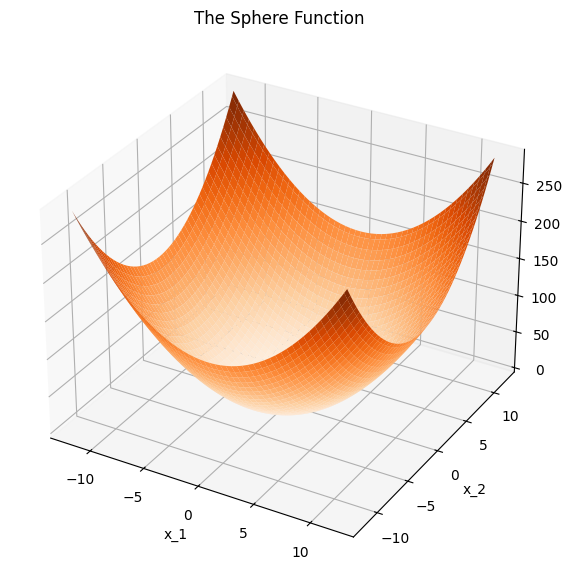

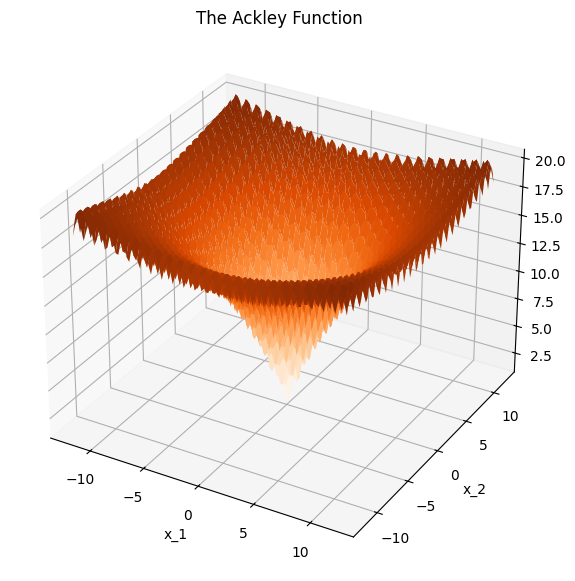

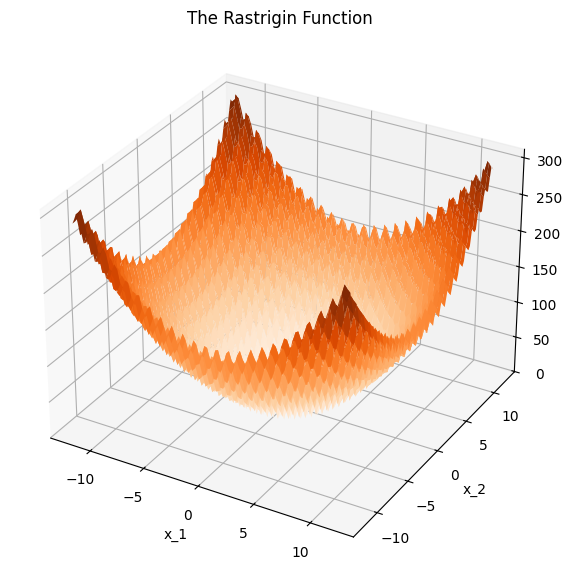

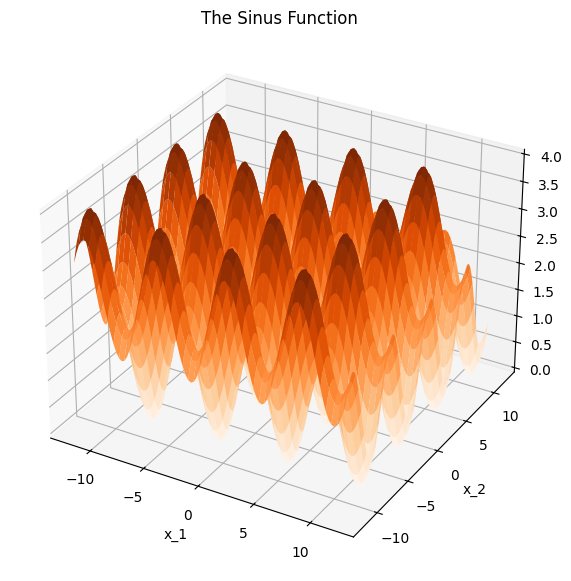

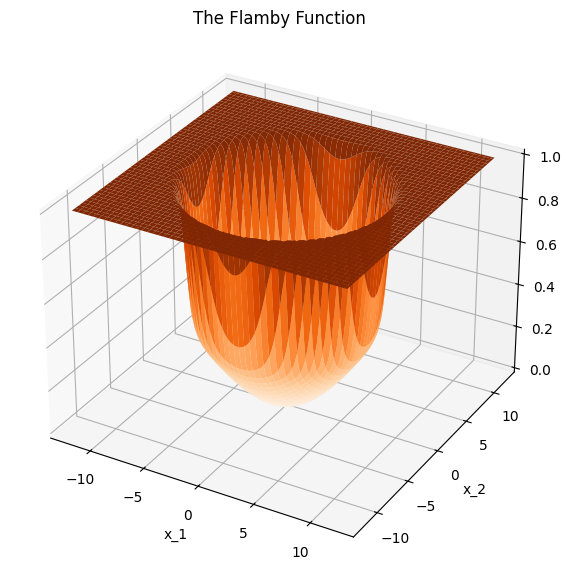



 2025-12-12 11:43:41 GMT
OK.


In [147]:
# myEvalFn
# requires: CMA

import sys
from deap import benchmarks
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sphere(x):
    return benchmarks.sphere(x)[0]

draw_function(sphere,"The Sphere Function")
print ()

def ackley(x):
    return benchmarks.ackley(x)[0]

draw_function(ackley,"The Ackley Function")
print ()

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]

draw_function(rastrigin,"The Rastrigin Function")
print ()

def multimodal_sine(x):
    """
    Compute the multimodal sine function value for a multi-dimensional input vector x.

    :param x: A numpy array representing the input vector of size N.
    :return: The computed value of the multimodal sine function for each element of x, summed.
    """
    # Apply the sine function to each element of x and sum the results
    result = np.sum(np.sin(x) + 1)
    return result

draw_function(multimodal_sine,"The Sinus Function")
print ()

def sigmoid(x, k=1): # used for Flamby function
    return 1 / (1 + np.exp(-k * x))

# flamby function is a smooth_gaussian which transition from gaussian to flat thanks to a sigmoid
# it works for both single and multiple points
# Usage: flamby(x) => fitness (used for minimisation)
# optional parameters:
#   a for gaussian height
#   c for gaussian width
#   k for sharpness of transition to flat outside the central region
def flamby(x, a=1, c=8, k=5):
    # Determine if x is a single point or an array of points
    if x.ndim == 1:
        dist = np.sqrt(np.sum(x**2))
    else:
        dist = np.sqrt(np.sum(x**2, axis=1))
    gaussian_part = a * np.exp(-(dist)**2 / (2 * c**2))
    transition = sigmoid(k * (c - dist)) * sigmoid(k * (c + dist))
    return 1.0 - gaussian_part * transition

draw_function(flamby,'The Flamby Function')
print ()

# Evaluate the Flamby function for a few single points in 3D and 10D space
'''
x_point = np.array([0.0, 0.0, 0.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([0.0, 0.0, 0.1])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([0.1, 0.1, 0.1])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([0.0, 0.0, 2.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([2.0, 2.0, 2.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([8.0, 8.0, 8.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([9.0, 9.0, 9.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
x_point = np.array([5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0])
print(f"The result of the function at point {x_point} is: {flamby(x_point)}")
# remark: increasing the number of dimensions narrow the region with non-flat response.
'''

#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")

# Questions

Exécutez la cellule ci-avant et observez les fonctions affichées.

1. Quelles sont les fonctions multimodales?

    Askey, Rastrigin, Sinus

2. Que dire de la fonction Sinus?

    La fonction a un nombre infini de minimums locaux.

3. Que dire de la fonction Flamby?

    La fonction est un unimodale avec un minimum global simple à trouver.


---

# Exercice A.2 : recherche au hasard

Le code ci-dessous lance une recherche aléatoire sur une fonction objectif passée en paramètre (fonction Flamby par défaut). Etudiez le code puis exécutez le avant de passer à la suite.

Remarque: *la variable dimensions définit (comme son nom l'indique) le nombre de dimensions du problème. La fonction plot_results n'affiche que les deux premières dimensions. Si le nombre de dimensions est supérieur à 2, la position affichée d'un individu peut ne pas rendre compte exactement de sa qualité.*

In [148]:
# NE PAS MODIFIER -- vous pouvez copier ce code et le modifier pour répondre aux questions des exercices suivants

def launch_random(individual, nbeval=10001, display=True, ma_func=flamby, rangeValue=20):
    i=0
    besteverFit = float("inf")
    besteverIt = 0
    besteverSolution = []
    data = []
    while i<nbeval:
        candidateSolution = np.random.uniform(-rangeValue,+rangeValue,len(individual))
        fit = ma_func(candidateSolution)
        if fit <= besteverFit:
            besteverSolution = np.copy(candidateSolution)
            besteverFit = fit
            besteverIt = i
            besteverSolution = np.array([candidateSolution])
        solution = np.array([candidateSolution])
        data.append(besteverFit)
        #if display and i == 0:
        #  plot_results(ma_func,solution, title="Gen %d"%(i), min_x=-15, max_x=15, min_y=-15, max_y=15) # on projette uniquement sur les deux premières dimensions.
        if display and i%(int(nbeval/10))==0:
          print ("it =",i,", current_fit =",fit,", best_fit =",besteverFit)
        i+=1
    if display:
        plot_results(ma_func,besteverSolution, title="Gen %d"%(besteverIt), min_x=-15, max_x=15, min_y=-15, max_y=15) # on projette uniquement sur les deux premières dimensions.
    print ("Best fit",besteverFit,"found at iteration",besteverIt)
    return besteverFit,data


# Recherche naïve sur les fonctions Sphere, Ackley et Rastrigin

Le code ci-dessous fait une recherche au hasard sur trois fonctions classiques en dimension **2** et avec une initialisation **entre -8 et 8** sur chaque dimension.

Exécutez la cellule, observez le résultat.

# Number of dimensions is 2
# Final graph traces the fitness value of the best-ever candidate thoughout optimisation (every 500 evaluations)

=-=-=-=-=
=-=-=-=-= SPHERE
=-=-=-=-=
it = 0 , current_fit = 64.35329148789873 , best_fit = 64.35329148789873
it = 1000 , current_fit = 61.3528142206443 , best_fit = 0.09441804136655918
it = 2000 , current_fit = 60.910308003297814 , best_fit = 0.0038842647307135154
it = 3000 , current_fit = 14.192378546352051 , best_fit = 0.0038842647307135154
it = 4000 , current_fit = 36.36760279717562 , best_fit = 0.0038842647307135154
it = 5000 , current_fit = 67.22576973895158 , best_fit = 0.0038842647307135154
it = 6000 , current_fit = 23.681279474755147 , best_fit = 0.0038842647307135154
it = 7000 , current_fit = 24.440424685667935 , best_fit = 0.0038842647307135154
it = 8000 , current_fit = 32.660587043050484 , best_fit = 0.0038842647307135154
it = 9000 , current_fit = 32.09458283950391 , best_fit = 0.0038842647307135154
it = 10000 , current_fit = 12.932138

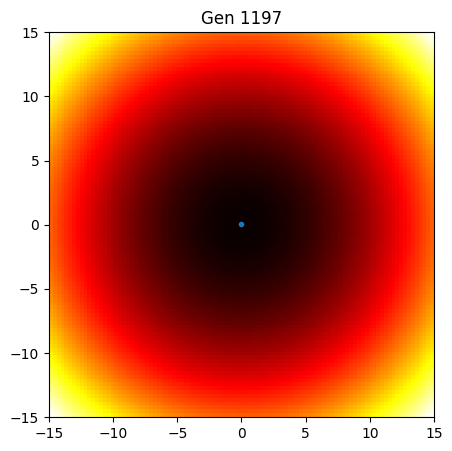

Best fit 0.0038842647307135154 found at iteration 1197


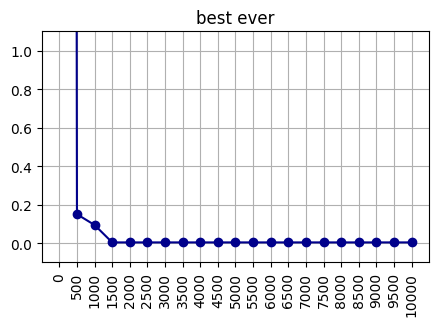


=-=-=-=-=
=-=-=-=-= ACKLEY
=-=-=-=-=
it = 0 , current_fit = 14.252961645286783 , best_fit = 14.252961645286783
it = 1000 , current_fit = 15.59789461629775 , best_fit = 1.931751860705395
it = 2000 , current_fit = 17.63728915216327 , best_fit = 0.7844320876699955
it = 3000 , current_fit = 13.944254219372645 , best_fit = 0.7844320876699955
it = 4000 , current_fit = 14.619205694104497 , best_fit = 0.7844320876699955
it = 5000 , current_fit = 6.51696326044345 , best_fit = 0.11664565344756905
it = 6000 , current_fit = 15.498902818408089 , best_fit = 0.11664565344756905
it = 7000 , current_fit = 16.899792192387107 , best_fit = 0.11664565344756905
it = 8000 , current_fit = 16.216881303485682 , best_fit = 0.11664565344756905
it = 9000 , current_fit = 11.936147777032328 , best_fit = 0.11664565344756905
it = 10000 , current_fit = 6.301369516969484 , best_fit = 0.11664565344756905


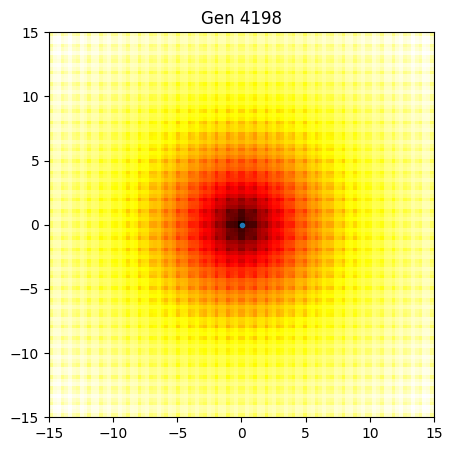

Best fit 0.11664565344756905 found at iteration 4198


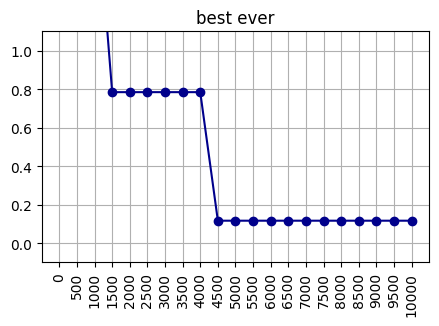


=-=-=-=-=
=-=-=-=-= RASTRIGIN
=-=-=-=-=
it = 0 , current_fit = 75.35297961664871 , best_fit = 75.35297961664871
it = 1000 , current_fit = 116.09587981891252 , best_fit = 1.7979199950029
it = 2000 , current_fit = 113.050451171724 , best_fit = 1.7979199950029
it = 3000 , current_fit = 86.85946488109695 , best_fit = 1.7979199950029
it = 4000 , current_fit = 88.31363177489544 , best_fit = 1.7979199950029
it = 5000 , current_fit = 42.06894995965622 , best_fit = 1.7979199950029
it = 6000 , current_fit = 58.28335327831047 , best_fit = 1.7979199950029
it = 7000 , current_fit = 94.98404376454816 , best_fit = 1.7979199950029
it = 8000 , current_fit = 83.60526182207138 , best_fit = 1.4330799569459494
it = 9000 , current_fit = 48.30220577414789 , best_fit = 1.4330799569459494
it = 10000 , current_fit = 124.98459941214455 , best_fit = 1.4330799569459494


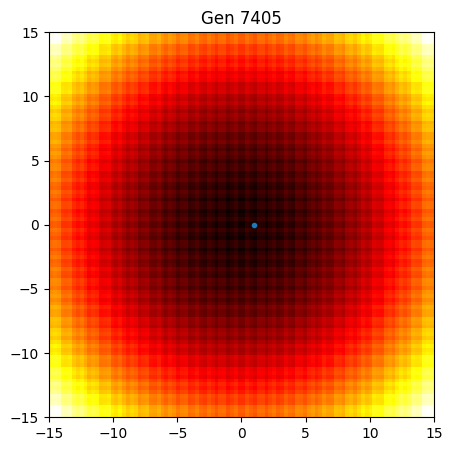

Best fit 1.4330799569459494 found at iteration 7405


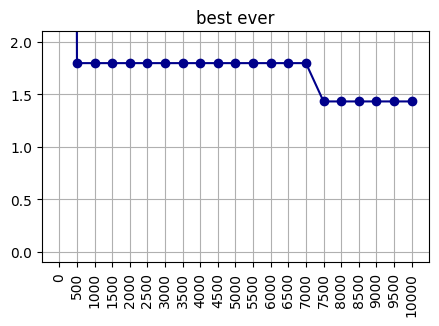

In [149]:
dimensions = 2 # nombre de dimensions de l'espace de recherche
interval=500
print ("# Number of dimensions is",dimensions)
print ("# Final graph traces the fitness value of the best-ever candidate thoughout optimisation (every",interval,"evaluations)")

print ("\n=-=-=-=-=\n=-=-=-=-= SPHERE\n=-=-=-=-=")
res,data = launch_random([0]*dimensions,ma_func=sphere,rangeValue=8)
plot_data(data,title="best ever",interval=interval,y_min=-0.1,y_max=1.1)

print ("\n=-=-=-=-=\n=-=-=-=-= ACKLEY\n=-=-=-=-=")
res,data = launch_random([0]*dimensions,ma_func=ackley,rangeValue=8)
plot_data(data,title="best ever",interval=interval,y_min=-0.1,y_max=1.1)

print ("\n=-=-=-=-=\n=-=-=-=-= RASTRIGIN\n=-=-=-=-=")
res,data = launch_random([0]*dimensions,ma_func=rastrigin,rangeValue=8)
plot_data(data,title="best ever",interval=interval,y_min=-0.1,y_max=2.1)


# Questions

1. Que montre le graphe "Gen XXX" ?

    XXX itération de la recherche

2. Que montre le graphe "best ever"?

    La meilleure solution trouvée de chaque itération

# Recherche naïve sur la fonction Sinus

Le code ci-dessous fait une recherche au hasard sur la fonction **Sinus** (multimodale) en dimension **2** et avec une initialisation **entre -8 et 8** sur chaque dimension.

Exécutez la cellule, observez le résultat.

# Number of dimensions is 2
# Final graph traces the fitness value of the best-ever candidate thoughout optimisation (every 500 evaluations)

=-=-=-=-=
=-=-=-=-= SINUS
=-=-=-=-=
it = 0 , current_fit = 2.63047730507282 , best_fit = 2.63047730507282
it = 1000 , current_fit = 1.8145268643942596 , best_fit = 3.541330862177894e-05
it = 2000 , current_fit = 2.336536066780031 , best_fit = 3.541330862177894e-05
it = 3000 , current_fit = 0.7685211035561633 , best_fit = 3.541330862177894e-05
it = 4000 , current_fit = 1.1933596643127742 , best_fit = 3.541330862177894e-05
it = 5000 , current_fit = 2.921922763834439 , best_fit = 3.541330862177894e-05
it = 6000 , current_fit = 2.6649632962945153 , best_fit = 3.541330862177894e-05
it = 7000 , current_fit = 2.01870899491451 , best_fit = 3.541330862177894e-05
it = 8000 , current_fit = 3.1961214795101967 , best_fit = 3.541330862177894e-05
it = 9000 , current_fit = 1.124113844098054 , best_fit = 3.541330862177894e-05
it = 10000 , current_fit = 2.92444646

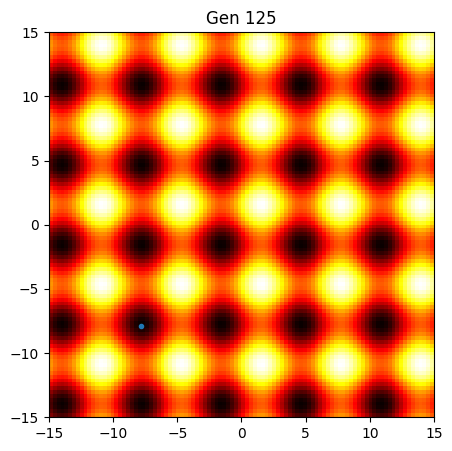

Best fit 3.541330862177894e-05 found at iteration 125


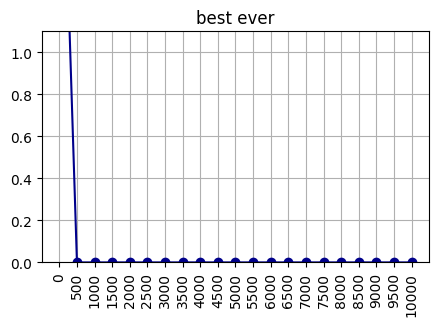

In [150]:
dimensions = 2 # nombre de dimensions de l'espace de recherche
interval=500
print ("# Number of dimensions is",dimensions)
print ("# Final graph traces the fitness value of the best-ever candidate thoughout optimisation (every",interval,"evaluations)")

print ("\n=-=-=-=-=\n=-=-=-=-= SINUS\n=-=-=-=-=")
res,data = launch_random([0]*dimensions,ma_func=multimodal_sine,rangeValue=8)
plot_data(data,title="best ever",interval=interval,y_min=0,y_max=1.1)


# Questions

1. Relancer plusieurs fois la recherche aléatoire sur la fonction Sinus. Qu'observez-vous? Pourquoi?

    La recherche aléatoire trouve des minimums locaux différents a chaque exécution, car la fonction Sinus a un nombre infini de minimums locaux.

# Recherche naïve sur la fonction Flamby

Le code ci-dessous fait une recherche au hasard sur la fonction **Flamby** en dimension **12** et avec une initialisation **entre -8 et 8** sur chaque dimension.

Exécutez la cellule, observez le résultat.


=-=-=-=-=
=-=-=-=-= FLAMBY
=-=-=-=-=
it = 0 , current_fit = 0.1542031293817222 , best_fit = 0.1542031293817222
it = 1000 , current_fit = 0.24644742479390913 , best_fit = 0.00030304673248071623
it = 2000 , current_fit = 0.04295955183448452 , best_fit = 1.0572056361901616e-05
it = 3000 , current_fit = 0.11892951082822667 , best_fit = 1.0572056361901616e-05
it = 4000 , current_fit = 0.011020525404786374 , best_fit = 1.0572056361901616e-05
it = 5000 , current_fit = 0.1834052037921119 , best_fit = 1.0572056361901616e-05
it = 6000 , current_fit = 0.034848578712144196 , best_fit = 1.0572056361901616e-05
it = 7000 , current_fit = 0.11514633676192532 , best_fit = 1.0572056361901616e-05
it = 8000 , current_fit = 0.008333331420589118 , best_fit = 1.0572056361901616e-05
it = 9000 , current_fit = 0.2553813195963557 , best_fit = 1.0572056361901616e-05
it = 10000 , current_fit = 0.12748234109713263 , best_fit = 1.0572056361901616e-05


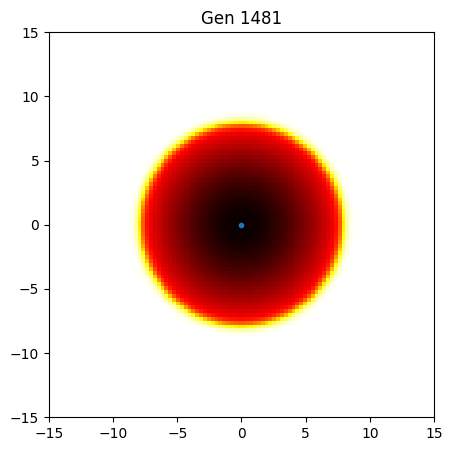

Best fit 1.0572056361901616e-05 found at iteration 1481


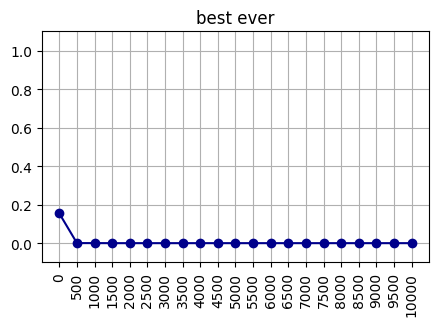

In [151]:

print ("\n=-=-=-=-=\n=-=-=-=-= FLAMBY\n=-=-=-=-=")
dimensions = 2
res,data = launch_random([0]*dimensions,ma_func=flamby,rangeValue=5)
plot_data(data,title="best ever",interval=interval,y_min=-0.1,y_max=1.1)


# Questions

1. Modifiez le code ci-dessus pour faire une recherche en 2, puis en 20 dimensions. Qu'observez vous? Pourquoi?

    En 2 dimensions, la recherche trouve le minimum global rapidement. 

    En 20 dimensions, la recherche est longue et inefficace car l'espace de recherche est beaucoup plus grand et la probabilité de trouver le minimum global diminue considérablement.

---
---
---

# <font color='orange'>PARTIE B : STRATEGIES D'EVOLUTION</font>


---

# Exercice B-1: algorithme (1+1)-ES

Implementez une stratégie d'évolution (1+1)-ES avec un sigma fixe dans la cellule ci-dessous. Vous pouvez vous inspirer de la fonction de recherche aléatoire présentée précédemment pour la structure globale.

Vous testerez cet algorithme sur la fonction Flamby présenté précédemment. Vous tracerez (comme montré à la question précédente) l'évolution de la population pour chaque exécution.


=-=-=-=-=
=-=-=-=-= Flamby Function with (1+1)-ES
=-=-=-=-=


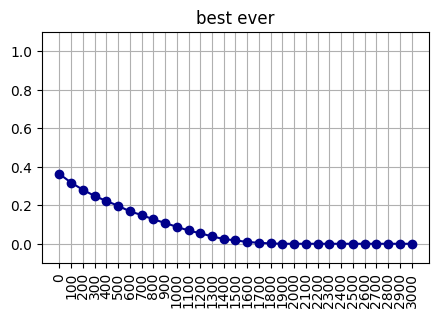

(display only the first 3000 iterations)


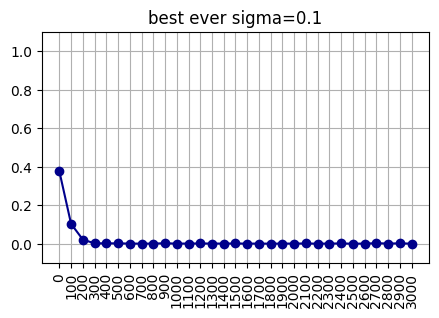

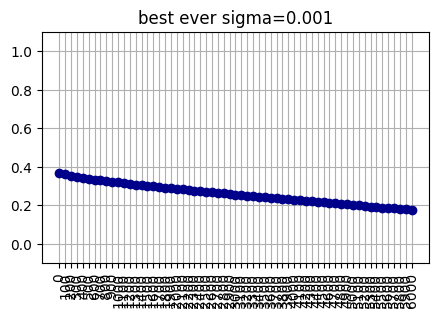

(display only the first 6000 iterations)


In [152]:
def launch_oneplusone(individual, sigma, nbeval=10001, display=True, ma_func=sphere):
    data = []
    parent = np.copy(individual)
    for _ in range(nbeval):
        child = np.random.normal(loc=parent, scale=sigma)
        parent_fit = ma_func(parent)
        child_fit = ma_func(child)
        if parent_fit >= child_fit:
            parent = np.copy(child)
        data.append(ma_func(child))
    return parent, data


print ("\n=-=-=-=-=\n=-=-=-=-= Flamby Function with (1+1)-ES\n=-=-=-=-=")

dimensions = 12
rangeValue = 5
initial_solution = np.random.uniform(-rangeValue, rangeValue, dimensions)
res,data = launch_oneplusone(initial_solution,sigma=0.01,nbeval=10001,ma_func=flamby)

interval = 100
plot_data(data[:3001],title="best ever",interval=interval,y_min=-0.1,y_max=1.1)
print("(display only the first 3000 iterations)")


res,data = launch_oneplusone(initial_solution,sigma=0.1,nbeval=10001,ma_func=flamby)
plot_data(data[:3001],title="best ever sigma=0.1",interval=interval,y_min=-0.1,y_max=1.1)

res,data = launch_oneplusone(initial_solution,sigma=0.001,nbeval=10001,ma_func=flamby)
plot_data(data[:6001],title="best ever sigma=0.001",interval=interval,y_min=-0.1,y_max=1.1)
print("(display only the first 6000 iterations)")

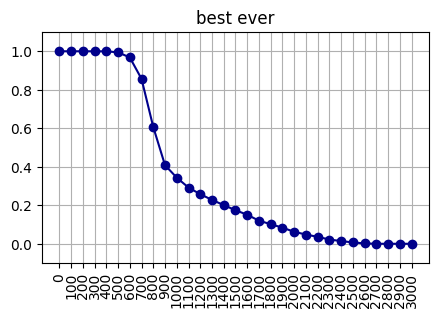

(display only the first 3000 iterations)


In [153]:
dimensions = 2
rangeValue = 10
initial_solution = np.random.uniform(-rangeValue, rangeValue, dimensions)
res,data = launch_oneplusone(initial_solution,sigma=0.01,nbeval=10001,ma_func=flamby)

interval = 100
plot_data(data[:3001],title="best ever",interval=interval,y_min=-0.1,y_max=1.1)
print("(display only the first 3000 iterations)")

# Questions

1. lancer la recherche en changeant l'ordre de grandeur de sigma (ie. 0.1 et 0.001). Qu'observez-vous?

    Avec un sigma plus grand (0.1), la recherche converge rapidement vers le minimum global
    Avec un sigma plus petit (0.001), la recherche est lente voire impossible avec un nombre limité d'itérations.

2. lancer plusieurs fois la recherche avec 2 dimensions et une solution initiale dont les valeurs sont tirées dans -10,+10 et sigma=0.01. Qu'observez-vous?

    La recherche trouve le minimum global rapidement à chaque exécution, car l'espace de recherche est petit en 2 dimensions.

3. lancer plusieurs fois la recherche avec 20 dimensions et une solution initiale dont les valeurs sont tirées dans -10,+10. Qu'observez-vous? Pourquoi?

    En 20 dimensions, la recherche est longue et inefficace car l'espace de recherche est beaucoup plus grand et la recherche se perd dans les valeurs où flanby = 0 et ne trouve pas le minimum global.

4. Pourquoi le remplacement du parent par l'enfant se fait aussi si les deux ont la même performance?

    Si le parent et l'enfant ont la même performance, le remplacement permet de ne pas stagner sur la même solution et d'explorer d'autres régions de l'espace de recherche.

---

# Exercice B-2: algorithme (1+1)-ES, règle des 1/5e

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma suivant la règle des 1/5e. Limitez la valeur de sigma entre 1e-10 et 2.

Vous testerez cette algorithme sur les mêmes fonction que précédemment. Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.


=-=-=-=-=
=-=-=-=-= Flamby Function with (1+1)-ES 1/5th rule
=-=-=-=-=


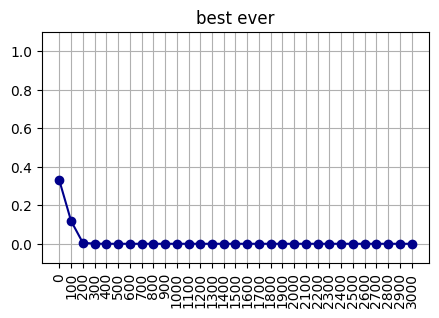

(display only the first 3000 iterations)


In [154]:
def launch_oneplusone_withOneFifthRule(individual, sigma_init=0.01, nbeval=10001, display=True, ma_func=sphere):
    data = []
    sigma = sigma_init
    parent = np.copy(individual)
    for _ in range(nbeval):
        child = np.random.normal(loc=parent, scale=sigma)
        parent_fit = ma_func(parent)
        child_fit = ma_func(child)
        if parent_fit >= child_fit:
            parent = np.copy(child)
            sigma *= 2
        else :
            sigma *= 2**(-1/4)
        data.append(child_fit)
    return parent, data

print ("\n=-=-=-=-=\n=-=-=-=-= Flamby Function with (1+1)-ES 1/5th rule\n=-=-=-=-=")

dimensions = 12
rangeValue = 5
initial_solution = np.random.uniform(-rangeValue, rangeValue, dimensions)
res,data = launch_oneplusone_withOneFifthRule(initial_solution,nbeval=10001,sigma_init=0.01,ma_func=flamby)

interval = 100
plot_data(data[:3001],title="best ever",interval=interval,y_min=-0.1,y_max=1.1)
print("(display only the first 3000 iterations)")

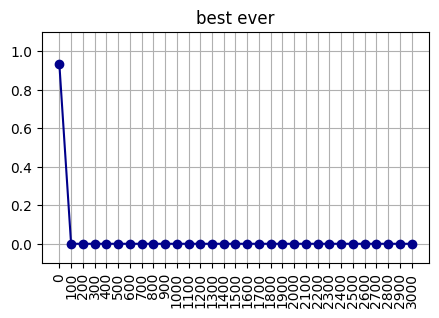

(display only the first 3000 iterations)


/tmp/ipykernel_8972/542463808.py:43: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-k * x))
/tmp/ipykernel_8972/542463808.py:55: RuntimeWarning: overflow encountered in square
  dist = np.sqrt(np.sum(x**2))


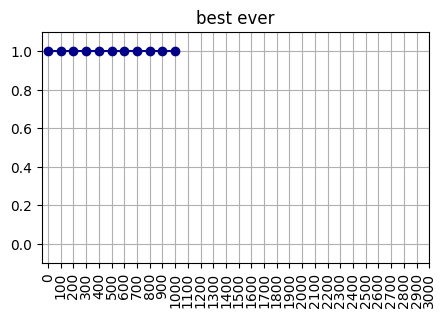

(display only the first 3000 iterations)


In [162]:
dimensions = 2
rangeValue = 10
initial_solution = np.random.uniform(-rangeValue, rangeValue, dimensions)
res,data = launch_oneplusone_withOneFifthRule(initial_solution,nbeval=10001,sigma_init=0.01,ma_func=flamby)

plot_data(data[:3001],title="best ever",interval=interval,y_min=-0.1,y_max=1.1)
print("(display only the first 3000 iterations)")


dimensions = 12
rangeValue = 10
initial_solution = np.random.uniform(-rangeValue, rangeValue, dimensions)
res,data = launch_oneplusone_withOneFifthRule(initial_solution,nbeval=10001,sigma_init=0.01,ma_func=flamby)

plot_data(data[:3001],title="best ever",interval=interval,y_min=-0.1,y_max=1.1)
print("(display only the first 3000 iterations)")

# Questions

1. lancer plusieurs fois la recherche avec 2 dimensions et une solution initiale dont les valeurs sont tirées dans -10,+10. Comparez avec les résultats obtenus précédemment. Qu'observez-vous?

    On converge plus rapidement qu'avant vers le minimum global, car la règle des 1/5e adapte efficacement sigma au cours de la recherche.

2. lancer plusieurs fois la recherche avec 20 dimensions et une solution initiale dont les valeurs sont tirées dans -10,+10. Qu'observez-vous?

    J'ai un overflow dans la fonction Flamby, la recherche ne fonctionne pas correctement.


---

# Exercice B-3: algorithme CMA-ES

Nous allons maintenant utiliser CMA-ES. La version standard est celle proposée dans la bibliothèque pycma (https://github.com/CMA-ES/pycma). Vous testerez cette bibliothèque sur les mêmes fonctions que précédemment.


In [ ]:
import cma

def launch_cmaes(dim=12, display=True, ma_func=flamby):
  es = cma.CMAEvolutionStrategy(12 * [0], 0.5)
  return es

print ("\n=-=-=-=-=\n=-=-=-=-= Flamby Function with CMA-ES\n=-=-=-=-=")

besteverFitness = launch_cmaes(display=True,ma_func=flamby)
besteverFitness = launch_cmaes(dim=100,display=True,ma_func=flamby)
besteverFitness = launch_cmaes(display=True,ma_func=rastrigin)
besteverFitness = launch_cmaes(display=True,ma_func=ackley)

print ("Terminé.")


=-=-=-=-=
=-=-=-=-= Flamby Function with CMA-ES
=-=-=-=-=
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=631017, Fri Dec 12 12:07:11 2025)
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=617714, Fri Dec 12 12:07:11 2025)
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=558415, Fri Dec 12 12:07:11 2025)
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=610313, Fri Dec 12 12:07:11 2025)
Terminé.


# Questions

1. lancez la recherche avec CMA-ES en 12 dimensions. Comparez avec les algos précédents. Qu'observez-vous?

2. lancez la recherche avec CMA-ES en 100 dimensions. Comparez avec les algos précédents. Qu'observez-vous?

3. lancez la recherche avec CMA-ES en 12 dimensions sur d'autres fonctions plus complexes (Rastrigin et Ackley). Comparez avec les algos précédents. Qu'observez-vous?

4. Commentez les graphes générés par CMAES

5. Comment forcer cma-es à chercher des valeurs de paramètres dans un intervale limité à [-5,+5]? Aide: lisez la section "Practical Hints" de https://cma-es.github.io/cmaes_sourcecode_page.html

